In [43]:
# General
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Classifer
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import svm #SVM
from sklearn.neural_network import MLPClassifier #Neural Network
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Linear Discriminant
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent

# PR curve
# from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

# Decision Tree plot
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus

#Cross Validation
from sklearn.model_selection import cross_val_score

In [44]:
def file_reader(path):
    df=pd.DataFrame()
    chunksize = 10 ** 6
    for chunk in pd.read_csv(path, chunksize=chunksize, index_col=[0]):
        df = df.append(chunk)
    return df

country='Russia'
data=file_reader('/Volumes/BECCA/Project/Data/Input/02_Preprocessing/05_Final/%s.csv' %country)

In [45]:
data

,tweet_text,polarity_number,subjectivity_number,repeat_tag,day,hour,minute,suspend
0,"Barcelona is so sunny and nice at Vmworld, tre...",0.700000,0.600000,0,6,10,32,1
1,Linear -up and –out scaling on disk and node l...,0.600000,0.200000,0,1,12,30,1
2,open for a surprise https://t.co/YrU8x3AhGC,0.500000,0.500000,0,5,11,27,1
3,MY HEART 😭❤️ https://t.co/iKrYLK5apF,0.500000,0.000000,0,1,12,21,1
4,cows are just big grass puppies https://t.co/6...,0.466667,0.133333,0,4,20,26,1
...,...,...,...,...,...,...,...,...
54165,RT @spacebongmilk: My girl can be butt ass nak...,0.500000,0.233333,0,2,18,19,0
54166,"Not a win again, but people that understands f...",0.600000,0.400000,0,3,2,29,0
54167,RT @alizawhoo: @lanascouture A girl can walk o...,0.600000,0.400000,0,2,16,56,0
54168,People don't understand what football means to...,0.396875,0.443750,0,3,7,4,0


In [46]:
#scaling data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
for i in data.columns:
    if i != 'tweet_text':
        x = np.array(data[i]).reshape(-1,1)
        data[i] = min_max_scaler.fit_transform(x)

In [47]:
data

,tweet_text,polarity_number,subjectivity_number,repeat_tag,day,hour,minute,suspend
0,"Barcelona is so sunny and nice at Vmworld, tre...",0.700000,0.600000,0.0,1.000000,0.434783,0.542373,1.0
1,Linear -up and –out scaling on disk and node l...,0.600000,0.200000,0.0,0.166667,0.521739,0.508475,1.0
2,open for a surprise https://t.co/YrU8x3AhGC,0.500000,0.500000,0.0,0.833333,0.478261,0.457627,1.0
3,MY HEART 😭❤️ https://t.co/iKrYLK5apF,0.500000,0.000000,0.0,0.166667,0.521739,0.355932,1.0
4,cows are just big grass puppies https://t.co/6...,0.466667,0.133333,0.0,0.666667,0.869565,0.440678,1.0
...,...,...,...,...,...,...,...,...
54165,RT @spacebongmilk: My girl can be butt ass nak...,0.500000,0.233333,0.0,0.333333,0.782609,0.322034,0.0
54166,"Not a win again, but people that understands f...",0.600000,0.400000,0.0,0.500000,0.086957,0.491525,0.0
54167,RT @alizawhoo: @lanascouture A girl can walk o...,0.600000,0.400000,0.0,0.333333,0.695652,0.949153,0.0
54168,People don't understand what football means to...,0.396875,0.443750,0.0,0.500000,0.304348,0.067797,0.0


# k=6

In [48]:
combination_name='All'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

X=np.array(data)[:,1:7].astype('float')
y=np.array(data)[:,7].astype('int')
        
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.65 (+/- 0.16)
Score of SVM = 0.64 (+/- 0.08)


In [49]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

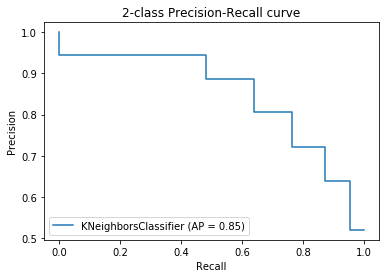

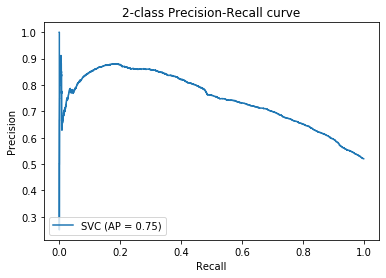

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','SVM']
classifier = [knn, SVM]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

In [51]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result=pd.DataFrame(result)
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,All,SVM,3792,1549,3656,1836,0.687529,0.673774,0.709979,0.691403


# k=5

In [52]:
combination_name='k=5'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 


X=np.array(data)[:,2:7].astype('float')
y=np.array(data)[:,7].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.63 (+/- 0.16)
Score of SVM = 0.60 (+/- 0.13)


In [53]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

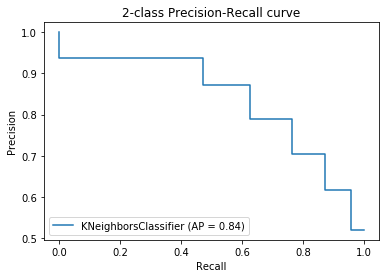

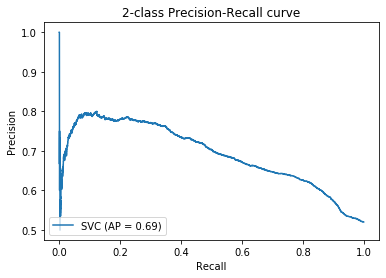

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','SVM']
classifier = [knn, SVM]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

In [55]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,All,SVM,3792,1549,3656,1836,0.687529,0.673774,0.709979,0.691403
0,k=5,knn,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
1,k=5,SVM,4485,2676,2529,1143,0.647466,0.796908,0.626309,0.701384


# k=4

In [56]:
combination_name='k=4'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

d=data[['subjectivity_number','day','hour','minute','suspend']]
X=np.array(d)[:,0:4].astype('float')
y=np.array(d)[:,4].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.63 (+/- 0.17)
Score of gnb = 0.61 (+/- 0.11)
Score of SVM = 0.60 (+/- 0.13)


In [57]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

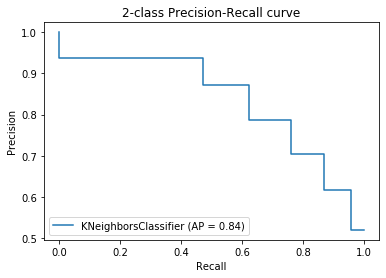

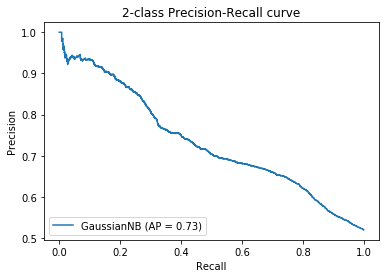

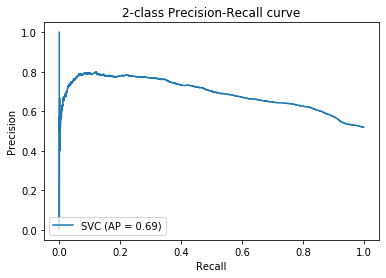

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','gnb','SVM']
classifier = [knn, gnb, SVM]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

In [59]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,All,SVM,3792,1549,3656,1836,0.687529,0.673774,0.709979,0.691403
0,k=5,knn,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
1,k=5,SVM,4485,2676,2529,1143,0.647466,0.796908,0.626309,0.701384
0,k=4,knn,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
1,k=4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
2,k=4,SVM,4487,2676,2529,1141,0.647651,0.797264,0.626414,0.701587


# k=3

In [60]:
combination_name='k=3'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

X=np.array(data)[:,4:7].astype('float')
y=np.array(data)[:,7].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.57 (+/- 0.16)
Score of dtree = 0.54 (+/- 0.21)


In [61]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

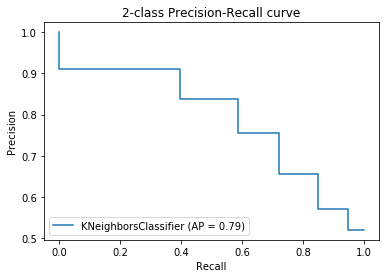

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn']
classifier = [knn]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

In [63]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,All,SVM,3792,1549,3656,1836,0.687529,0.673774,0.709979,0.691403
0,k=5,knn,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
1,k=5,SVM,4485,2676,2529,1143,0.647466,0.796908,0.626309,0.701384
0,k=4,knn,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
1,k=4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
2,k=4,SVM,4487,2676,2529,1141,0.647651,0.797264,0.626414,0.701587
0,k=3,knn,4065,1323,3882,1563,0.733592,0.722281,0.754454,0.738017


# k=2

In [65]:
combination_name='k=2'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

X=np.array(data)[:,4:6].astype('float')
y=np.array(data)[:,7].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.56 (+/- 0.18)
Score of gnb = 0.51 (+/- 0.16)
Score of dtree = 0.54 (+/- 0.20)


In [67]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

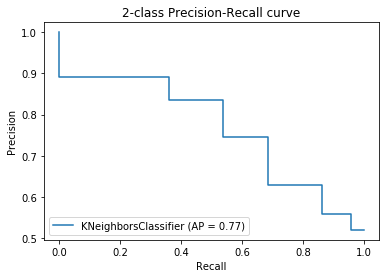

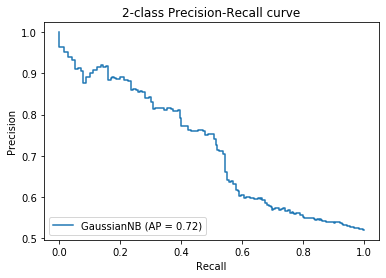

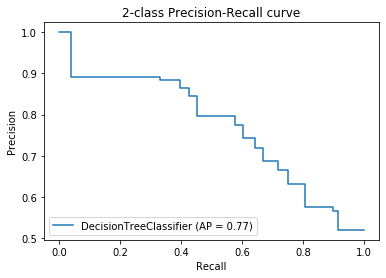

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','gnb','dtree']
classifier = [knn,gnb, dtree]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

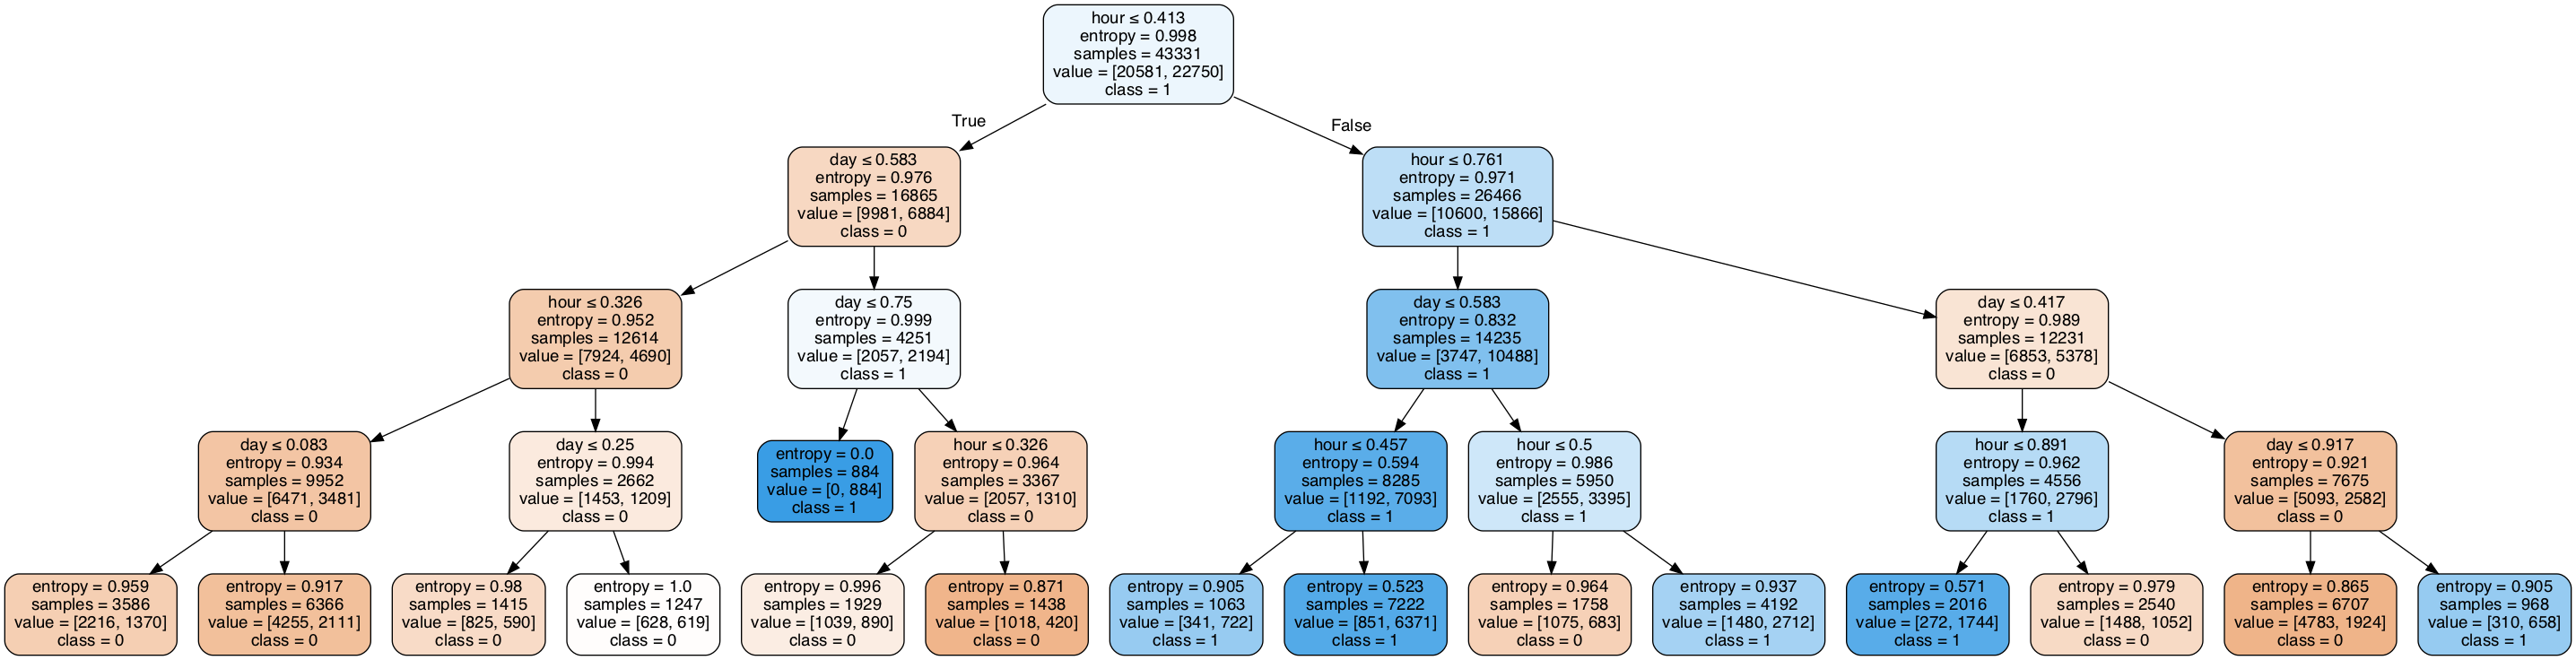

In [69]:
dot_data = StringIO()
feature_cols=list(data.columns[4:6])
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('/Volumes/BECCA/Project/Data/Result/Russia/By_classifier/%s/Decision Tree.png' %combination_name)

Image(graph.create_png())

In [70]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,All,SVM,3792,1549,3656,1836,0.687529,0.673774,0.709979,0.691403
0,k=5,knn,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
1,k=5,SVM,4485,2676,2529,1143,0.647466,0.796908,0.626309,0.701384
0,k=4,knn,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
1,k=4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
2,k=4,SVM,4487,2676,2529,1141,0.647651,0.797264,0.626414,0.701587
0,k=3,knn,4065,1323,3882,1563,0.733592,0.722281,0.754454,0.738017
0,k=2,knn,3864,1312,3893,1764,0.716053,0.686567,0.746522,0.715291
1,k=2,gnb,4268,3258,1947,1360,0.573710,0.758351,0.567101,0.648928


# L1-based Feature selection

In [71]:
combination_name='L1-based'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

d=data[['polarity_number','subjectivity_number','day','hour','minute','suspend']]
X=np.array(d)[:,0:5].astype('float')
y=np.array(d)[:,5].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.65 (+/- 0.16)
Score of SVM = 0.64 (+/- 0.08)


In [72]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

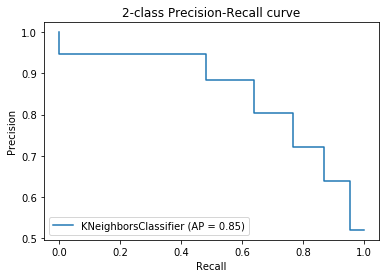

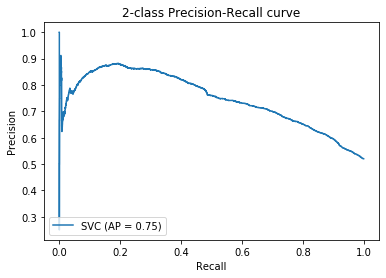

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','SVM']
classifier = [knn, SVM]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

In [74]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,All,SVM,3792,1549,3656,1836,0.687529,0.673774,0.709979,0.691403
0,k=5,knn,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
1,k=5,SVM,4485,2676,2529,1143,0.647466,0.796908,0.626309,0.701384
0,k=4,knn,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
1,k=4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
2,k=4,SVM,4487,2676,2529,1141,0.647651,0.797264,0.626414,0.701587
0,k=3,knn,4065,1323,3882,1563,0.733592,0.722281,0.754454,0.738017
0,k=2,knn,3864,1312,3893,1764,0.716053,0.686567,0.746522,0.715291
1,k=2,gnb,4268,3258,1947,1360,0.573710,0.758351,0.567101,0.648928


# Tree-based feature selection

In [75]:
combination_name='Tree-based'
parent_dir = "/Volumes/BECCA/Project/Data/Result/Russia/By_classifier"
path = os.path.join(parent_dir, combination_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

d=data[['subjectivity_number','day','hour','suspend']]
X=np.array(d)[:,0:3].astype('float')
y=np.array(d)[:,3].astype('int')

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
SVM = svm.SVC(kernel='poly')
nn = MLPClassifier(activation='identity',solver='adam', max_iter=1000)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

scores_1 = cross_val_score(knn, X, y, cv=10)
scores_2 = cross_val_score(gnb, X, y, cv=10)
scores_3 = cross_val_score(dtree, X, y, cv=10)
scores_4 = cross_val_score(SVM, X, y, cv=10)
scores_5 = cross_val_score(nn, X, y, cv=10)
scores_6 = cross_val_score(lr, X, y, cv=10)
scores_7 = cross_val_score(sgd, X, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Classifier Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)
std_score = std_score/len(scores)

for i,j in zip(['knn','gnb','dtree','SVM','nn','lr','sgd'], scores):    
    if j.mean() > mean_score:
        if j.std() < std_score:
            print('Score of %s = %0.2f (std = %0.2f)' %(i, j.mean(), j.std()))

Classifier Selection:
Score of knn = 0.62 (+/- 0.15)
Score of gnb = 0.62 (+/- 0.12)


In [76]:
#Result collection
Classifier=[]
Score=[]
TP=[]
FP=[]
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

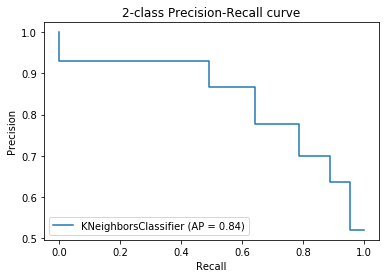

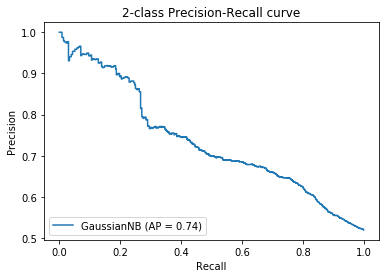

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

name = ['knn','gnb']
classifier = [knn, gnb]

for clf,clf_name in zip(classifier, name):
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Classifier.append(clf_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/Russia/By_classifier/%s/PR_plot/PR_%s.png' %(combination_name, clf_name))

In [78]:
Combination=[]
for i in range(len(Score)):
    Combination.append(combination_name)
result={'Combination':Combination, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,All,SVM,3792,1549,3656,1836,0.687529,0.673774,0.709979,0.691403
0,k=5,knn,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
1,k=5,SVM,4485,2676,2529,1143,0.647466,0.796908,0.626309,0.701384
0,k=4,knn,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
1,k=4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
2,k=4,SVM,4487,2676,2529,1141,0.647651,0.797264,0.626414,0.701587
0,k=3,knn,4065,1323,3882,1563,0.733592,0.722281,0.754454,0.738017
0,k=2,knn,3864,1312,3893,1764,0.716053,0.686567,0.746522,0.715291
1,k=2,gnb,4268,3258,1947,1360,0.573710,0.758351,0.567101,0.648928


In [79]:
clf_result = clf_result.reset_index()
clf_result = clf_result.drop(['index'],axis=1)
clf_result.to_csv('/Volumes/BECCA/Project/Data/Result/Russia/By_classifier/Total_Result.csv')

In [80]:
clf_result

,Combination,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,All,knn,4309,1038,4167,1319,0.782424,0.765636,0.805872,0.785239
1,All,SVM,3792,1549,3656,1836,0.687529,0.673774,0.709979,0.691403
2,k=5,knn,4297,1151,4054,1331,0.770885,0.763504,0.788730,0.775912
3,k=5,SVM,4485,2676,2529,1143,0.647466,0.796908,0.626309,0.701384
4,k=4,knn,4284,1155,4050,1344,0.769316,0.761194,0.787645,0.774194
5,k=4,gnb,3888,1974,3231,1740,0.657159,0.690832,0.663255,0.676762
6,k=4,SVM,4487,2676,2529,1141,0.647651,0.797264,0.626414,0.701587
7,k=3,knn,4065,1323,3882,1563,0.733592,0.722281,0.754454,0.738017
8,k=2,knn,3864,1312,3893,1764,0.716053,0.686567,0.746522,0.715291
9,k=2,gnb,4268,3258,1947,1360,0.573710,0.758351,0.567101,0.648928
